# IMDB VERİLERİNİ KULLANARAK ÖNERİ ALGORİTMALARI GELİŞTİRMEK

Bu projede imdb film ve özelliklerinin bulunduğu veri setini kullanarak film öneri sistemlerini kurmaya çalışacağız.
3 adımda bu işlemleri gerçekleştireceğiz. <br> 1.adımda verilerimizi, üzerinde işlem yapabileceğimiz hale getirebilmek için bazı değişiklikler yapacağız. <br> 2. ve 3. adımlarda yaygın olarak kullanılan 2 yöntemi işleyeceğiz.

**1-VERİ YÜKLEME, BİRLEŞTİRME VE TEMİZLEME**

**2-BASIC RECOMMENDATION SYSTEM (TEMEL DÜZEY ÖNERİ SİSTEMİ)**

**3-CONTENT-BASED RECOMMENDATION SYSTEM (İÇERİK TABANLI ÖNERİ SİSTEMİ)**

Kullanacağımız kütüphaneleri ekliyoruz. 

Verilerimiz üzerinde işlemleri yapmak için "import" komutu ile "pandas" ve "numpy" kütüphanelerini, sonuçlarımızı görselleştirebilmek için "matplotlib" ve "seaborn" kütüphanelerini ekliyoruz. 

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

##  1- VERİ YÜKLEME, BİRLEŞTİRME VE TEMİZLEME
Bu kısımda 2 adet verimiz var onları alıyoruz. "movie_id" ve "id" alanları üzerinden birleştirme yapıyoruz.<br>Ve ihtiyacımız olmayan alanların bir kısmını verimizin dışında bırakıyoruz

In [3]:
data_credits= pd.read_csv("tmdb_5000_credits.csv")
data_movies = pd.read_csv("tmdb_5000_movies.csv")

In [4]:
# data_credits dataset imizin ilk 3 satırını görmek için ".head(3)" komutunu kullanıyoruz.

data_credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [5]:
# data_movies dataset imizin ilk 3 satırını görmek için ".head(3)" komutunu kullanıyoruz.

data_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [6]:
# dataset lerimizin kaç satır kaç sütundan oluştuğunu görüyoruz.

print("Data Credits:", data_credits.shape)
print("Data Movies:", data_movies.shape)


Data Credits: (4803, 4)
Data Movies: (4803, 20)


Aynı filmleri içerdikleri için satır sayıları aynı, filmler ile ilgli farklı türden bilgiler içerdikleri için sütun sayıları farklı

In [7]:
# data_credits dataset imizin sütunlarını görmek için ".columns" komutunu kullanıyoruz.

data_credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

data_credits dataframe imizin içerdiği bilgi sütunları:

#movie_id

title = başlık

cast = oyuncu kadrosu

crew = ekip

In [8]:
# data_movies dataset imizin sütunlarını görmek için ".columns" komutunu kullanıyoruz.

data_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

data_movies datafreame imizin içerdiği bilgi sütunları:

#id

budget = bütçe

genres = tür

...

In [9]:
#İki dataframe i birleştirebilmemiz için aynı sütun isimlerine sahip olmaları gerekiyor.
#Bu yüzden ".rename" komutu ile "data_movies" dataframe imizin "id" kolonunu "movie_id" olarak değiştiriyoruz.
# "inplace=true" komutu ile yeni bir kopya oluşturulmadan doğrudan dataframe imiz üzerinde değişiklik yapılmasını sağlıyourz.

data_movies.rename(columns = {"id":"movie_id"},inplace=True)

In [10]:
#"id" kolonu "movie_id" olacak şekilde değişmiş mi? 
#kontrol etmek için tekrar ".columns" komutu ile "data_movies" datset imizin sütunlarını çağırıp kontrol ediyoruz.

data_movies.columns

Index(['budget', 'genres', 'homepage', 'movie_id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [11]:
# dataset lerimizi "merge" fonksiyonu ile "movie_id" sütunu üzerinde birleştiriyoruz
# ve "data_all" dataframe imizi elde ediyoruz.

data_all = data_movies.merge(data_credits,on="movie_id")

In [12]:
# "all.sahpe" komutu ile birleştirilmiş veri setimizin satır ve sütunlarının uzunluklarına bakıyoruz.
# bir hata olup olmadığını kontrol ediyoruz.

data_all.shape

(4803, 23)

satır sayısında bir değişiklik olmadı.

sütun sayısı ise: 20(data_movies) + 4(data_credits) - 1(movie_id) = 23 oldu.

In [13]:
# dataset imizin ilk 3 satırını görüntülüyoruz

data_all.head(3)

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [14]:
# dataset imizde kullanmak istemediğimiz kolonları belirlemek için sütun isimlerini listeliyoruz.

data_all.columns

Index(['budget', 'genres', 'homepage', 'movie_id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title_x', 'vote_average', 'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [15]:
# ".dorp" komutu ile istemediğimiz "Budget", "Homepage" ve "Status" alanlarını dataset imizden çıkarıyoruz.
# kopya oluşturmadan doğrudan değiştirmek için "inplace=True" komutu kullanıyoruz.

data_all.drop(columns=["budget","homepage","status"],inplace=True)

In [16]:
# tekrar dataset imizin son halini tekrar listeletiyoruz.

data_all.head(3)

,genres,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


##  2- TEMEL DÜZEY ÖNERİ SİSTEMİ - BASIC RECOMMENDATION SYSTEM
Bu alanda "Weighted Rating" - "Ağırlıklı Puan" hesabı yapacağız.

Bunun için aşağıdaki formülü kullanmış olacağız.  

<img src="imdb_calculate.png" style="width:360px;height:160px" align="left"/>

kaynak = https://www.irjet.net/archives/V8/i5/IRJET-V8I5320.pdf

In [17]:
# V:Filmler için verilen oyların toplam sayısı
# R:Filmlerin ortalama almış oldukları oylar
# C:Filmlerin almış oldukları oyların ortalamaları
# m:Filmler için verilen oyların toplam sayısının Çeyrekliği

V = data_all['vote_count']
R = data_all['vote_average']
C = data_all['vote_average'].mean()
m = data_all['vote_count'].quantile(0.75)


#Yeni bir sütun tanımlayarak hesapladığımız değerleri buraya atıyoruz
data_all['weighted_average'] = (V/(V+m) * R) + (m/(m+V) * C)

In [18]:
#Burada tüm verilerimizi azalan şekilde sıralıyoruz(Hesapladığımız Ağırlıklı Puan sütunu üzerinden)
#Sıralama yaptırdığımız yeni veri setimizi belli sütunları göstererek listeliyoruz

movies_ranked = data_all.sort_values('weighted_average', ascending=False)
movies_ranked[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

# original title = film başlığı
# vote count = oy sayısı
# vote average = ortalama oy
# weighted average = ağırlıklı ortalama puan
# popularity = filmin popülerliği

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.301547,136.747729
3337,The Godfather,5893,8.4,8.143459,143.659698
662,Fight Club,9413,8.3,8.139688,146.757391
3232,Pulp Fiction,8428,8.3,8.122458,121.463076
65,The Dark Knight,12002,8.2,8.078054,187.322927
809,Forrest Gump,7927,8.2,8.020698,138.133331
96,Inception,13752,8.1,7.997869,167.583710
1818,Schindler's List,4329,8.3,7.978806,104.469351
3865,Whiplash,4254,8.3,7.973979,192.528841
95,Interstellar,10867,8.1,7.972478,724.247784


### GRAFİK ÜZERİNDE GÖSTERMEK

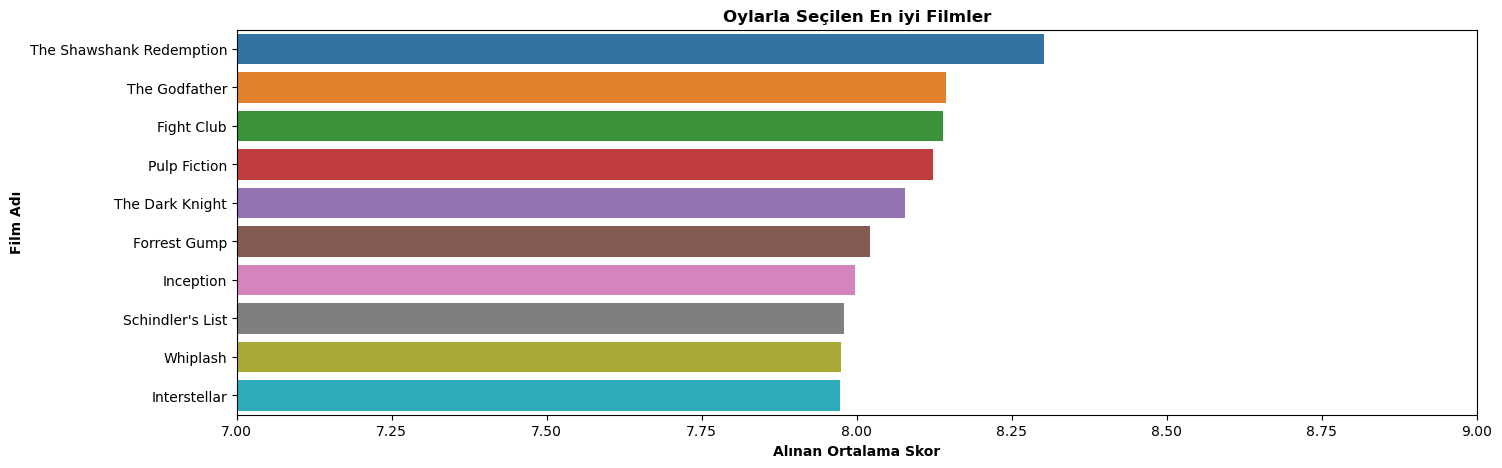

In [19]:
plt.figure(figsize=(16,5))
ax = sns.barplot(x=movies_ranked['weighted_average'].head(10), y=movies_ranked['original_title'].head(10))

plt.xlim(7,9)
plt.title('Oylarla Seçilen En iyi Filmler', weight='bold')
plt.xlabel('Alınan Ortalama Skor', weight='bold')
plt.ylabel('Film Adı', weight='bold')

plt.savefig('best_movies.png')

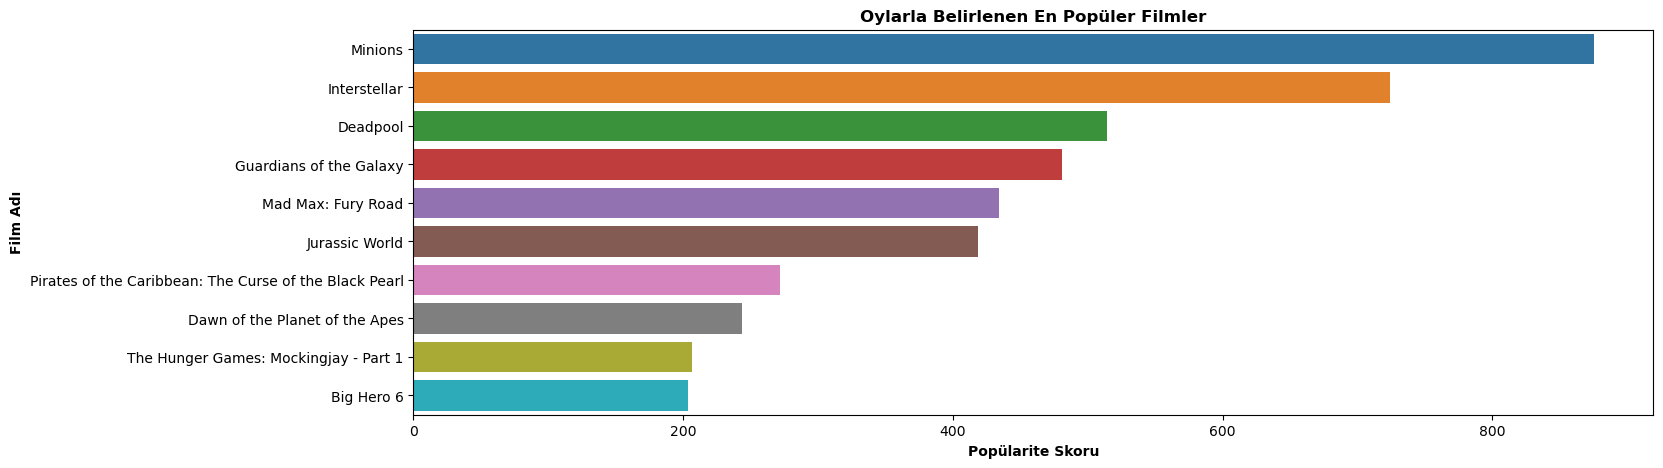

In [20]:
popular = movies_ranked.sort_values('popularity', ascending=False)

plt.figure(figsize=(16,5))

ax = sns.barplot(x=popular['popularity'].head(10), y=popular['original_title'].head(10))

plt.title('Oylarla Belirlenen En Popüler Filmler', weight='bold')
plt.xlabel('Popülarite Skoru', weight='bold')
plt.ylabel('Film Adı', weight='bold')

plt.savefig('popular_movies.png')

## 3 - İÇERİK TABANLI ÖNERİ SİSTEMİ - CONTENT-BASE RECOMMENDATION SYSTEM 

In [21]:
#Film hakkında önizleme yazılarını listeliyoruz
data_all["overview"].head(7)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
5    The seemingly invincible Spider-Man goes up ag...
6    When the kingdom's most wanted-and most charmi...
Name: overview, dtype: object

In [22]:
#önizleme yazıları içerisinde boş değer olup olmadığına bakıyoruz
data_all.overview.isnull().any()

True

anlaşılan boş değer varmış, o halde "sum" komutu ile kaç tane boş değer olduğunu öğrenelim

In [37]:
#Kaç adet boş satır olduğunu buluyoruz
data_all.overview.isnull().sum()

0

In [24]:
#"fillna" komutu ile veri girilmemiş alanlara boş atama yapalım
data_all['overview'] = data_all['overview'].fillna('')


### -Filmlerimizi tanımlayan kelimeleri ve sıklıklarını hesaplıyoruz. 
-Benzerliklerini anlayabilmemiz için Matrix dönüşümü uyguluyoruz
x
Yaptığımız işlemler sonucunda 4803 filmimizi 20,978 farklı kelime tarafından tanımlandığını buluyoruz


## -Filmlerimizi tanımlayan kelimeleri ve sıklıklarını hesaplıyoruz. 

## -Benzerliklerini anlayabilmemiz için Matrix dönüşümü uyguluyoruz

Yaptığımız işlemler sonucunda 4803 filmimizi 20,978 farklı kelime tarafından tanımlandığını buluyoruz

In [25]:
#TfIdfVectorizer fonksiyonunu scikit-learn kütüphanesinden ekliyoruz
from sklearn.feature_extraction.text import TfidfVectorizer

#Burada "stop_words" komutu ile ingilizce "the" , "a" ,"an" gibi kelimeleri temizliyoruz.
tfidf = TfidfVectorizer(stop_words='english')

#Fonksiyonu kullanarak dönüşüm işlemini yapıyoruz
tfidf_matrix = tfidf.fit_transform(data_all['overview'])

#Veri setimizin satır ve sütun sayılarını görüntülüyoruz
tfidf_matrix.shape

(4803, 20978)

In [26]:
data_all['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

### COSINE BENZERLİĞİNİ KULLANMAK
Benzerlik puanlamasını hesaplamak için birkaç farklı matematiksel yöntem var. Euclidean, Pearson ve Cosine benzerlikleri bunların en bilinenleri. Bu projemizde Cosine Benzerliğini kullanarak benzerlik puanlarımızı bulacağız

<img src="cosine.png" style="width:280px;height:70px" align="left"/>

In [38]:
#linear_kernel ekliyoruz
# bu işlemler için "sklearn" makine öğrenim kütüphanesini kullanıyoruz
# benzerlik ölçümü için "pairwise" dedik
from sklearn.metrics.pairwise import linear_kernel

#cosine benzerliğini hesaplatıyoruz
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [28]:
#indexlerin ve film başlıklarının ters haritasını oluşturuyoruz. Tekrar eden değerleri listeden çıkarıyoruz
indices = pd.Series(data_all.index, index=data_all['original_title']).drop_duplicates()

In [29]:
# Bu fonksiyon ile fonksiyona göndermiş olduğumuz filme en yakın benzerlikte ki 10 filmi geri döndürecek
def get_recommendations(title, cosine_sim=cosine_sim):
    # Girilen filmin indeksini al
    idx = indices[title]

    # Bu filmin diğer tüm filmlerle olan benzerlik puanlarını listele
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Filmleri benzerlik puanlarına göre sırala
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # En çok benzeyen 10 filmin skorunu al
    sim_scores = sim_scores[1:11]

    # Film indekslerini al
    movie_indices = [i[0] for i in sim_scores]

    # En çok benzeyen 10 filmi döndür
    return data_all['original_title'].iloc[movie_indices]


### ÖNERİ FONKSİYONUMUZ TAMAM. ÖRNEK YAPALIM

In [39]:
#"The Usual Suspects" fiilmine benzer 10 film önerisi
get_recommendations("The Usual Suspects")

1269                                  Raise the Titanic
2143                                         Ghost Ship
2287                         I Can Do Bad All By Myself
770                                       Event Horizon
4287                                            Niagara
3212                                           The Rose
2902                                           Triangle
4228                        The Ballad of Jack and Rose
171     Master and Commander: The Far Side of the World
104                                            Poseidon
Name: original_title, dtype: object

In [31]:
#"Pulp Fiction" filmine benzer 10 film önerisi
get_recommendations("Pulp Fiction")

3526            The Sting
3194       All or Nothing
3466        Sliding Doors
4624            Locker 13
2917          The Fighter
4036            Antibirth
3491         The Wackness
2849             Nebraska
3504                11:14
3346    Jumping the Broom
Name: original_title, dtype: object

In [32]:
# "Fight Club" filmine benzer 10 film önerisi

get_recommendations("Fight Club")

3619                      UHF
2828                Project X
2585          The Hurt Locker
2344              Raging Bull
2023               The Animal
1414      Blast from the Past
4044               Go for It!
3515             Freaky Deaky
4045    Dancer, Texas Pop. 81
4760    This Is Martin Bonner
Name: original_title, dtype: object

In [33]:
# "The Godfather" Filmine benzer 10 film önerisi

get_recommendations("The Godfather")

2731     The Godfather: Part II
1873                 Blood Ties
867     The Godfather: Part III
3727                Snabba Cash
3623                       Made
3125                     Eulogy
3896                   Sinister
4506            The Maid's Room
3783                        Joe
2244      The Cold Light of Day
Name: original_title, dtype: object

In [34]:
 # "Se7en" fimine benzer 10 film önerisi

get_recommendations("Se7en")

1379              The Cell
1009    The Bone Collector
968      Murder by Numbers
761         Righteous Kill
1905       My Soul to Take
2138               Copycat
3853                  2:13
421                 Zodiac
1020               Taken 3
1320            Switchback
Name: original_title, dtype: object

In [35]:
# "The Green Mile" filmine benzer 10 film önerisi

get_recommendations("The Green Mile")

3741                             Monster's Ball
1897                             Half Past Dead
980                      The Life of David Gale
3985    Friday the 13th Part VII: The New Blood
2926                           Dead Man Walking
931                      Race to Witch Mountain
2375                           Midnight Special
1310                     Paul Blart: Mall Cop 2
2539                                     Snitch
606                                    Blackhat
Name: original_title, dtype: object

In [36]:
# "The Pianist" Filmine benzer 10 film önerisi

get_recommendations("The Pianist")

3529                          Shine
3090              Cecil B. Demented
2734           Miracles from Heaven
2905                         Snatch
4186    A Beginner's Guide to Snuff
667                    Oliver Twist
4349                 Love Me Tender
2671     Born on the Fourth of July
3345              Definitely, Maybe
4110             Inside Deep Throat
Name: original_title, dtype: object

In [37]:
# "The Shinin" filmine benzer 10 film önerisi

get_recommendations("The Shining")

403            Last Action Hero
3139              Adventureland
2397               Hotel Rwanda
3289    The Wendell Baker Story
388              Ocean's Eleven
2114       Return to Never Land
4146                    Highway
943                    Firewall
4613             Wendy and Lucy
2207                  12 Rounds
Name: original_title, dtype: object

In [38]:
# "Eternal Sunshine of the Spotless Mind" filmine benzer 10 film önerisi

get_recommendations ("Eternal Sunshine of the Spotless Mind")

3320                                   Extract
1485                               The Watcher
2968                      In the Land of Women
3278    And When Did You Last See Your Father?
1528                                  Criminal
4762                         George Washington
2802                              Solitary Man
4281                                   Rebecca
3434            A Home at the End of the World
3256                               New in Town
Name: original_title, dtype: object

In [23]:
# "Scarface" filmine benzer 10 film önerisi

get_recommendations ("nception")

NameError: name 'get_recommendations' is not defined

## SONUÇ

Öneri Algoritmalarından Basic Recommendation System (Temel Düzey Öneri Sistemi) ve Content-Based Recommender System (İçerik Tabanlı Öneri Sistemi) nasıl çalışıyor, mantığı nedir bu projede onu anlatmaya çalıştım. Bunların dışında Collobrative Filtering (Kullanıcı benzerliklerine göre) öneri algoritmalarıda çok yaygın olarak kullanılmaktadır.
Günümüzde popüler olan ve ileride de popülerliğini koruyacak alan olduğunu düşünüyorum

Bu projeyi araştırmalarım sonucunda geliştirdim. Farklı kaynaktan bulduğum kaynak kodların üzerinde düzenlemeler, değişiklikler yaparak geliştirdim. Öneri algoritmalarını seçmemin sebebi bu konuya ilgim var ve bu konuda kendi algoritmalarımı geliştirmek isitiyorum. Bu proje giriş seviyesinde işin mantığını ve arkada yatan matematiği anlamam açısından faydalı oldu. 